In [63]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from time import time

In [64]:
def inputData():
    dfX = pd.read_csv("./data/q1/linearX.csv",usecols=[0],names=["X"],header=None)
    inputListX=dfX['X'].tolist()
    dfY = pd.read_csv("./data/q1/linearY.csv",usecols=[0],names=["Y"],header=None)
    inputListY=dfY['Y'].tolist()
    return inputListX,inputListY

    

In [65]:
#normalize function (x-mean)/std for each value in input listX

def normalize(data):
    mean = np.mean(data)
    std = np.std(data)
    data = data -mean
    data = data/std
    return data
    

In [66]:
# batch Gradient descent 

In [67]:
# step 1: creating input DATA
#         Making Design matrix "X" with X0=1

def align(inputListX,inputListY):
    
    numpyListX = normalize(np.reshape(np.array(inputListX),(-1,1)))
    numpyListY = np.reshape(np.array(inputListY),(-1,1))
    
    data = np.append( numpyListX,numpyListY, axis = 1)

    np.random.shuffle(data)  #shuffling data to make it random for better distribution

    x = data[:, 0 : 1]  #copy all rows and only copy zeroth col [0,1)
    y = data[:, 1 : 2]  #copy all rows and only copy first col [1,2)
    ones = np.ones((x.shape[0], 1))
    X = np.append(ones, x, axis = 1)
    return x,y,X
# print(numpyListX.shape)
# print(ones.shape)
# print(X.shape)

In [68]:
#step 2: create theta vector 

# theta = np.zeros((X.shape[1],1))
# print(theta.shape)
# print(theta)

In [69]:
# step 3: define a cost function

def costFuction(y,X,theta):
    hypothesis = np.dot(X,theta)
    error = y-hypothesis
    errorSquared =error**2
    examples = X.shape[0] #X.shape[0] represents number of training example
    return np.sum(errorSquared)/(2*examples) 


    

In [70]:
#step 4: define a gradient function

def gradientFunction(X,y,theta):
    error = np.dot(X,theta) - y  # h(X) -y
    grad_cost = np.zeros((2,1))
    grad_cost[0] = np.sum(error*X[:,0:1])/(X.shape[0])
    grad_cost[1] = np.sum(error*X[:,1:2])/(X.shape[0])
    return grad_cost
        

In [89]:
# implement gradient descent unitil it converges

def gradientDescent():
    (inputListX,inputListY) = inputData()
    (x,y,X) = align(inputListX,inputListY)
    
    theta = np.zeros((X.shape[1],1))  # initializing theta vector

    learningRate = 1.3
    
    #first iteration to implement do while 
    oldTheta = theta.copy()  #theta(t)
    theta -= learningRate*gradientFunction(X,y,theta) #theta(t+1)

    costPlot = [] # list for plot of costfunction
    costOld = costFuction(y,X,oldTheta)
    costNew = costFuction(y,X,theta)
    costPlot.append(costOld)
    costPlot.append(costNew)
    
    while(abs(costNew - costOld) > 1e-15 ):
        costOld = costNew.copy()
        oldTheta = theta.copy()
        theta -= learningRate*gradientFunction(X,y,theta)
        costNew = costFuction(y,X,theta)
        costPlot.append(costNew)
    return x,y,X,theta,costPlot


In [90]:
def plot():
    start=time()
    (x,y,X,theta,costPlot) = gradientDescent()
    end =time() -start
    print(theta)
    print("total time {}".format(end))
    # plot data point and hypothesis
    plt.scatter(x,y)
    plt.plot(x,theta[0]+x*theta[1] , color='r')
    plt.title("linear regression" )
    plt.show()

    #plot cost function
    plt.plot(costPlot)
    plt.show()

[[0.9966201]
 [0.0013402]]
total time 0.01810479164123535


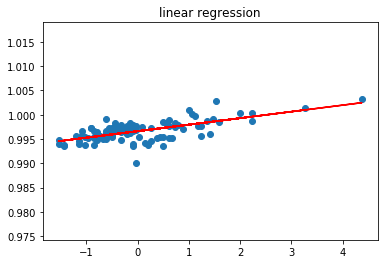

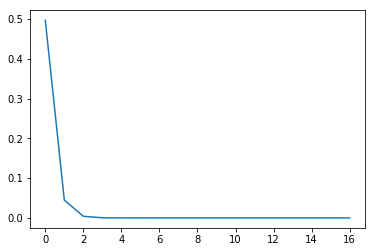

In [91]:
plot()

In [15]:
# lst=np.array([1,2,3])

In [18]:
# lst?